## install package

In [2]:
pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   --------------------------------------- 549.1/549.1 kB 17.5 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install --upgrade scipy

In [10]:
pip install --upgrade statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 9.5/9.5 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install optuna-dashboard

   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   -------------- ------------------------- 3.1/8.4 MB 18.7 MB/s eta 0:00:01
   ---------------------------------- ----- 7.3/8.4 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 8.4/8.4 MB 17.5 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [optuna-dashboard]
   ---------------------------------------- 2/2 [optuna-dashboard]

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install lightgbm optuna


   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   ---------------------------------------- 0/4 [Mako]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   --------------------------

In [27]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install lightgbm

## Create regression data

In [1]:
import os
import pandas as pd
import numpy as np

TIME_FREQUENCY='5min'
DATA_DIR =  r'C:\Users\w.bi\OneDrive - IESEG\Desktop\Domino\data\G_tau33'

# REGRESSION_INPUT_VALID_G_FILE_PATH =  os.path.join(DATA_DIR, 'Endogenous_data_with_valid_G_values_prim_sec_delay_observed_rec_' + TIME_FREQUENCY + '.csv')
REGRESSION_INPUT_VALID_G_DALTA_FILE_PATH  =  os.path.join(DATA_DIR, 'Endogenous_data_with_valid_G_values_prim_sec_delay_observed_Delta_rec_' + TIME_FREQUENCY + '.csv')

pd.set_option('display.max_columns', None)

In [2]:
complx_cols = ['cnt_moves', 'cnt_platform_out_moves', 'cnt_red',
    'cnt_kruising', 'sum_pri_delay', 'cnt_pri_delay', 'cnt_change_comp',
    'cnt_trains', 'cnt_S_NORMAL', 'cnt_S_WRONG', 'cnt_signals', 'incident',
    'density', 'complexity', 'non_robustness', 'operational_factor', 'TCC_wit'
]


complx_net_cols = ['C_cnt_signals_mean', 'D_cnt_signals_mean', 'E_cnt_signals_mean',
 'G_cnt_signals_mean', 'I_cnt_signals_mean', 'M_cnt_signals_mean',
 'N_cnt_signals_mean', 'R_cnt_signals_mean', 'T_cnt_signals_mean',
 'C_incident_mean', 'D_incident_mean', 'E_incident_mean',
 'G_incident_mean', 'I_incident_mean', 'M_incident_mean',
 'N_incident_mean', 'R_incident_mean', 'T_incident_mean',
 'C_density_mean', 'D_density_mean', 'E_density_mean',
 'G_density_mean', 'I_density_mean', 'M_density_mean',
 'N_density_mean', 'R_density_mean', 'T_density_mean',
 'C_complexity_mean', 'D_complexity_mean', 'E_complexity_mean',
 'G_complexity_mean', 'I_complexity_mean', 'M_complexity_mean',
 'N_complexity_mean', 'R_complexity_mean', 'T_complexity_mean',
 'C_non_robustness_mean', 'D_non_robustness_mean', 'E_non_robustness_mean',
 'G_non_robustness_mean', 'I_non_robustness_mean', 'M_non_robustness_mean',
 'N_non_robustness_mean', 'R_non_robustness_mean', 'T_non_robustness_mean',
 'C_operational_factor_mean', 'D_operational_factor_mean', 'E_operational_factor_mean',
 'G_operational_factor_mean', 'I_operational_factor_mean', 'M_operational_factor_mean',
 'N_operational_factor_mean', 'R_operational_factor_mean', 'T_operational_factor_mean']

thres_sec = 60

## Load our real dataset

In [3]:
sec_delay_df = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_secondary_delay_cleaned_5min.parquet'))
sec_delay_df.head(5)

,i,j,t,c,r0_5min_detection,r1_5min_detection,r2_5min_detection,delayjustifiedbyreason
0,-43095,-13745,73,1137,73,6,4,143
1,-96837,-73430,73,1137,73,6,4,115
2,-76539,-96837,74,1137,74,6,4,103
3,-15617,-73430,75,1137,75,6,4,185
4,-86247,-57615,75,1137,75,6,4,97


In [4]:
# s_r_w_df = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_function_S_r_w0_5min.parquet'))
# s_r_w_df.head(6)

s_r_w_df = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_function_S_CRIPTON_COMPLEX_5min.parquet'),
                           engine="fastparquet")

print('S_Cripton NA: ', s_r_w_df['Signal'].isna().sum())
s_r_w_df.head(10)

S_Cripton NA:  293583


,i,s,t,m,r0,r1,r2,"w(i,t)","t-w(i,t)","r0(t - max(w(i,t)))","r1(t - max(w(i,t)))","r2(t - max(w(i,t)))",tr_type,Signal,Micro_time,TCC,WS_NO,cnt_moves,cnt_platform_out_moves,cnt_red,cnt_kruising,sum_pri_delay,cnt_pri_delay,cnt_change_comp,cnt_trains,cnt_S_NORMAL,cnt_S_WRONG,cnt_signals,incident,density,complexity,non_robustness,operational_factor,C_cnt_signals_mean,D_cnt_signals_mean,E_cnt_signals_mean,G_cnt_signals_mean,I_cnt_signals_mean,M_cnt_signals_mean,N_cnt_signals_mean,R_cnt_signals_mean,T_cnt_signals_mean,C_incident_mean,D_incident_mean,E_incident_mean,G_incident_mean,I_incident_mean,M_incident_mean,N_incident_mean,R_incident_mean,T_incident_mean,C_density_mean,D_density_mean,E_density_mean,G_density_mean,I_density_mean,M_density_mean,N_density_mean,R_density_mean,T_density_mean,C_complexity_mean,D_complexity_mean,E_complexity_mean,G_complexity_mean,I_complexity_mean,M_complexity_mean,N_complexity_mean,R_complexity_mean,T_complexity_mean,C_non_robustness_mean,D_non_robustness_mean,E_non_robustness_mean,G_non_robustness_mean,I_non_robustness_mean,M_non_robustness_mean,N_non_robustness_mean,R_non_robustness_mean,T_non_robustness_mean,C_operational_factor_mean,D_operational_factor_mean,E_operational_factor_mean,G_operational_factor_mean,I_operational_factor_mean,M_operational_factor_mean,N_operational_factor_mean,R_operational_factor_mean,T_operational_factor_mean
0,-53372,219,0,stop,0,6,4,8,0,0,6,4,IC,367064.0,2023-04-01 00:02:29+02:00,I,11.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,38.0,9.0,47.0,0.0,0.32,0.0,0.00,0.0,32.200001,40.57143,58.5,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.8,0.428571,1.5,2.0,3.166667,2.0,0.0,0.0,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.25,0.125,0.166667,0.25,0.181818,0.0,0.0,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.25,0.454545,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
1,-85230,1781,0,passing,0,6,4,127,0,0,6,4,L,401061.0,2023-04-01 00:03:07+02:00,R,14.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,17.0,4.0,21.0,0.0,0.18,0.0,0.33,0.0,32.200001,40.57143,58.5,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.8,0.428571,1.5,2.0,3.166667,2.0,0.0,0.0,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.25,0.125,0.166667,0.25,0.181818,0.0,0.0,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.25,0.454545,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
2,-85230,1196,0,stop,0,6,4,147,0,0,6,4,L,401061.0,2023-04-01 00:03:07+02:00,R,14.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,17.0,4.0,21.0,0.0,0.18,0.0,0.33,0.0,32.200001,40.57143,58.5,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.8,0.428571,1.5,2.0,3.166667,2.0,0.0,0.0,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.25,0.125,0.166667,0.25,0.181818,0.0,0.0,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.25,0.454545,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
3,-53372,1357,0,passing,0,6,4,-32,1,1,6,4,IC,367064.0,2023-04-01 00:02:29+02:00,I,11.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,38.0,9.0,47.0,0.0,0.32,0.0,0.00,0.0,32.200001,40.57143,58.5,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.8,0.428571,1.5,2.0,3.166667,2.0,0.0,0.0,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.25,0.125,0.166667,0.25,0.181818,0.0,0.0,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.25,0.454545,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
4,-54740,1584,1,passing,1,6,4,2,1,1,6,4,L,591991.0,2023-04-01 00:07:51+02:00,G,18.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,34.0,6.0,40.0,0.0,0.29,0.0,0.10,0.0,32.200001,40.57143,58.5,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.8,0.428571,1.5,2.0,3.166667,2.0,0.0,0.0,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.25,0.125,0.166667,0.25,0.181818,0.0,0.0,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.25,0.454545,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
5,-5

In [5]:
tcc_avg = s_r_w_df.groupby(['TCC', 't'])['w(i,t)'].transform('mean')

# Step 2: Compute the average w(i,t) per t (for rows where TCC is NaN)
t_avg = s_r_w_df.groupby('t')['w(i,t)'].transform('mean')

# Step 3: Create the new column using tcc_avg if TCC is not NaN, else t_avg
s_r_w_df['TCC_wit'] = tcc_avg.where(s_r_w_df['TCC'].notna(), t_avg)

In [22]:
s_r_w_df.head(20)

,i,s,t,m,r0,r1,r2,"w(i,t)","t-w(i,t)","r0(t - max(w(i,t)))","r1(t - max(w(i,t)))","r2(t - max(w(i,t)))",Signal,Micro_time,TCC,WS_NO,cnt_moves,cnt_platform_out_moves,cnt_red,cnt_kruising,sum_pri_delay,cnt_pri_delay,cnt_change_comp,cnt_trains,cnt_S_NORMAL,cnt_S_WRONG,cnt_signals,incident,density,complexity,non_robustness,operational_factor,C_cnt_signals_mean,D_cnt_signals_mean,E_cnt_signals_mean,G_cnt_signals_mean,I_cnt_signals_mean,M_cnt_signals_mean,N_cnt_signals_mean,R_cnt_signals_mean,T_cnt_signals_mean,C_incident_mean,D_incident_mean,E_incident_mean,G_incident_mean,I_incident_mean,M_incident_mean,N_incident_mean,R_incident_mean,T_incident_mean,C_density_mean,D_density_mean,E_density_mean,G_density_mean,I_density_mean,M_density_mean,N_density_mean,R_density_mean,T_density_mean,C_complexity_mean,D_complexity_mean,E_complexity_mean,G_complexity_mean,I_complexity_mean,M_complexity_mean,N_complexity_mean,R_complexity_mean,T_complexity_mean,C_non_robustness_mean,D_non_robustness_mean,E_non_robustness_mean,G_non_robustness_mean,I_non_robustness_mean,M_non_robustness_mean,N_non_robustness_mean,R_non_robustness_mean,T_non_robustness_mean,C_operational_factor_mean,D_operational_factor_mean,E_operational_factor_mean,G_operational_factor_mean,I_operational_factor_mean,M_operational_factor_mean,N_operational_factor_mean,R_operational_factor_mean,T_operational_factor_mean,TCC_wit
0,-53372,219,0,stop,0,6,4,8,0,0,6,4,367064.0,2023-04-01 00:02:29+02:00,I,11.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,38.0,9.0,47.0,0.0,0.32,0.0,0.00,0.0,32.200001,40.571430,58.500000,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.80,0.428571,1.5,2.0,3.166667,2.0,0.000000,0.000000,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.250000,0.125,0.166667,0.250000,0.181818,0.0,0.000000,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.250000,0.454545,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,-12.000000
1,-85230,1781,0,passing,0,6,4,127,0,0,6,4,401061.0,2023-04-01 00:03:07+02:00,R,14.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,17.0,4.0,21.0,0.0,0.18,0.0,0.33,0.0,32.200001,40.571430,58.500000,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.80,0.428571,1.5,2.0,3.166667,2.0,0.000000,0.000000,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.250000,0.125,0.166667,0.250000,0.181818,0.0,0.000000,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.250000,0.454545,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,137.000000
2,-85230,1196,0,stop,0,6,4,147,0,0,6,4,401061.0,2023-04-01 00:03:07+02:00,R,14.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,17.0,4.0,21.0,0.0,0.18,0.0,0.33,0.0,32.200001,40.571430,58.500000,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.80,0.428571,1.5,2.0,3.166667,2.0,0.000000,0.000000,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.250000,0.125,0.166667,0.250000,0.181818,0.0,0.000000,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.250000,0.454545,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,137.000000
3,-53372,1357,0,passing,0,6,4,-32,1,1,6,4,367064.0,2023-04-01 00:02:29+02:00,I,11.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,38.0,9.0,47.0,0.0,0.32,0.0,0.00,0.0,32.200001,40.571430,58.500000,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.80,0.428571,1.5,2.0,3.166667,2.0,0.000000,0.000000,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871,0.084677,0.146597,0.066667,0.250000,0.125,0.166667,0.250000,0.181818,0.0,0.000000,0.0,0.0,0.230769,0.054054,0.190476,0.222222,0.181818,0.310345,0.047619,0.250000,0.454545,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,-12.000000
4,-54740,1584,1,passing,1,6,4,2,1,1,6,4,591991.0,2023-04-01 00:07:51+02:00,G,18.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,34.0,6.0,40.0,0.0,0.29,0.0,0.10,0.0,32.200001,40.571430,58.500000,37.200001,46.666668,37.5,57.333332,41.333332,44.75,1.80,0.428571,1.5,2.0,3.166667,2.0,0.000000,0.000000,0.25,0.099237,0.150407,0.208955,0.327273,0.210526,0.233871

In [6]:
G_df = pd.read_csv(REGRESSION_INPUT_VALID_G_DALTA_FILE_PATH)
G_df.drop(['D_it','a_it','a_jt'], axis=1, inplace=True)
# df['Δwjt'] = df['Δwjt'].abs()
# df['Δwjt-1'] = df['Δwjt-1'].abs()
# df['Δwjt-2'] = df['Δwjt-2'].abs()
# df['Δwjt-3'] = df['Δwjt-3'].abs()

sec_delay_tmax = sec_delay_df['t'].max()
G_df = G_df[G_df['t'] <= sec_delay_tmax]
G_df = G_df.sort_values(by=['i', 'j', 't'])

print(G_df.shape)

(1230753, 17)


In [7]:
################################################################################
# The following functions `get_r0(t)`, `get_r1(t)`, and `get_r2(t)` are helper functions that take 
# an integer 't' or a panda series(column) containing simplified time units 't' (in blocks of 5 minutes) as input 
# and returns an integer or a panda series containing
# - r0: The minute unit (0 to 287, where 0 represents the first minute and 287 represents the last minute of a day).
# - r1: The day of the week (1 to 7, where 1 is Monday and 7 is Sunday).
# - r2: The month (1 to 12, where 1 is January and 12 is December).
################################################################################

def get_r0(t):
    """
    Takes an integer t (simplified time units) or pd.Series 't'.

    Args:
    - t: int or pd.series format the simplified time unit.

    Returns:
    - r0: returns int if 't' is int or pd.series if 't' is pd.series
    """
    if type(t) == int:

        timestamp = start_timestamp + pd.Timedelta(minutes=t * MINUTE)
        total_minutes = (timestamp.hour * 60) + timestamp.minute

        # Convert to simplified time units
        r0 = np.ceil(total_minutes // MINUTE).astype(int)

    else:

        timedelta_values = pd.to_timedelta(t * MINUTE, unit='m')
        timestamp_val = start_timestamp + timedelta_values
    
        r0 = np.ceil((timestamp_val.dt.hour * 60 + timestamp_val.dt.minute) // MINUTE).astype(int)
    
    return r0

#---------------------------------

def get_r1(t):   
    """
    Takes an integer t (simplified time units) or pd.Series 't'.

    Args:
    - t: int or pd.series format the simplified time unit.

    Returns:
    - r1: returns int if 't' is int or pd.series if 't' is pd.series
    """
    if type(t) == int:
        
        timestamp = start_timestamp + pd.Timedelta(minutes=t * MINUTE)
        r1 = timestamp.dayofweek + 1

    else:
    
        timedelta_values = pd.to_timedelta(t * MINUTE, unit='m')
        timestamp_val = start_timestamp + timedelta_values
        r1 = timestamp_val.dt.dayofweek + 1

    return r1

#---------------------------------

    
def get_r2(t):
    """
    Takes an integer t (simplified time units) or pd.Series 't'.

    Args:
    - t: int or pd.series format the simplified time unit.

    Returns:
    - r2: returns int if 't' is int or pd.series if 't' is pd.series
    """
    if type(t) == int:
            
        timestamp = start_timestamp + pd.Timedelta(minutes=t * MINUTE)
        r2 = timestamp.month

    else:
        timedelta_values = pd.to_timedelta(t * MINUTE, unit='m')
        timestamp_val = start_timestamp + timedelta_values
        r2 = timestamp_val.dt.month

    return r2

#---------------------------------

    
def get_r3(t):
    """
    Takes an integer t (simplified time units) or pd.Series 't'.

    Args:
    - t: int or pd.series format the simplified time unit.

    Returns:
    - r2: returns int if 't' is int or pd.series if 't' is pd.series
    """
    if type(t) == int:
            
        timestamp = start_timestamp + pd.Timedelta(minutes=t * MINUTE)
        r3 = timestamp.day

    else:
        timedelta_values = pd.to_timedelta(t * MINUTE, unit='m')
        timestamp_val = start_timestamp + timedelta_values
        r3= timestamp_val.dt.day

    return r3

In [8]:
from datetime import datetime
start_timestamp = pd.Timestamp(datetime(2023, 4, 1, 0, 0, 0), tz='Europe/Paris')
MINUTE= 5

G_df['r0'] = get_r0(G_df['t'])
G_df['day'] = get_r1(G_df['t'])
G_df['month'] = get_r2(G_df['t'])
G_df['date'] = get_r3(G_df['t'])
G_df.head(10)

,gplus_0,gplus_1,gplus_2,gminus_0,gminus_1,gminus_2,i,j,t,c,"w_{i,j,t}^c",wjt,wit-1,Δwjt,Δwjt-1,Δwjt-2,Δwjt-3,r0,day,month,date
1068400,1,0,0,0,0,0,-99970,-71996,831,1134,0,66,331,-88.0,2.0,38.0,17.0,255,1,4,3
1068401,0,0,0,1,0,0,-99970,-71996,833,1134,0,17,334,-13.0,-36.0,-88.0,2.0,257,1,4,3
1068408,0,0,2,0,0,0,-99970,-71996,1119,1134,0,1226,-30,49.0,20.0,1.0,-15.0,255,2,4,4
1068410,0,1,3,0,0,0,-99970,-71996,1120,1134,0,1216,-14,-10.0,49.0,20.0,1.0,256,2,4,4
1068412,0,0,1,0,0,3,-99970,-71996,1121,1134,0,1194,-34,-22.0,-10.0,49.0,20.0,257,2,4,4
1068414,0,0,0,1,2,4,-99970,-71996,1122,1134,0,1200,-60,6.0,-22.0,-10.0,49.0,258,2,4,4
1068417,0,0,0,0,0,3,-99970,-71996,1123,1134,0,1096,-52,-104.0,6.0,-22.0,-10.0,259,2,4,4
1068427,1,0,0,0,0,0,-99970,-71996,1407,1134,0,179,312,-57.0,47.0,63.0,-6.0,255,3,4,5
1068428,0,0,0,1,1,0,-99970,-71996,1409,1134,0,150,340,28.0,-57.0,-57.0,47.0,257,3,4,5
1068433,1,0,0,0,0,0,-99970,-71996,1693,1134,0,127,5,-3.0,-2.0,68.0,-25.0,253,4,4,6


### Combine G function with independent variables

In [9]:
from tqdm import tqdm
tqdm.pandas()

s_r_w_df2 = s_r_w_df.rename(columns={'i': 'train_id'})

complx_features = ['cnt_signals', 'incident',
    'density', 'complexity', 'non_robustness', 'operational_factor'
] + complx_net_cols

# Keep only needed columns
station_info = (
    s_r_w_df2[['train_id', 't', 's'] + complx_cols + complx_net_cols]
    .drop_duplicates(subset=['train_id', 't', 's'])  # Remove duplicate (train_id,t)
    .rename(columns={'s': 'station_j'})
)

# --- 2) Merge with df ------------------------------------------------------
speci_df = G_df.merge(
    station_info,
    left_on=['j', 't'],
    right_on=['train_id', 't'],
    how='left'
)


train_type_lookup = (
    s_r_w_df[['i', 'tr_type']]
    .dropna(subset=['tr_type'])
    .drop_duplicates(subset=['i'])
    .set_index('i')['tr_type']
)


speci_df['i_type'] = speci_df['i'].map(train_type_lookup)
speci_df['j_type'] = speci_df['j'].map(train_type_lookup)


# --- 3) Build lookup: train_id → sorted table of (t, station_j) ----------
lookup = {
    tid: grp[['t', 'station_j'] + complx_cols + complx_net_cols]
            .sort_values('t')
            .reset_index(drop=True)
    for tid, grp in station_info.groupby('train_id')
}

# --- 4) Function to find closest station_j when NA ------------------------
def fill_closest(row):
    # recover train id
    tid = row['j']
    t0  = row['t']

    # Always assign train_id = j
    row['train_id'] = tid

    # If station_j not missing → nothing to fill
    if pd.notna(row['station_j']):
        return row

    # If train not present in lookup → leave NA
    if tid not in lookup:
        return row

    tbl = lookup[tid]

    # find closest t
    idx = (tbl['t'] - t0).abs().idxmin()
    closest = tbl.loc[idx]

    # fill station_j
    row['station_j'] = closest['station_j']

    # fill all complexity variables
    for col in complx_cols + complx_net_cols:      # your list
        row[col] = closest[col]

    return row

# --- 1. Mark NA rows ---
na_mask = speci_df[['station_j']].isna().any(axis=1)
na_rows = speci_df[na_mask].copy()
clean_rows = speci_df[~na_mask].copy()

# --- 2. Fill NA rows ---
na_rows = na_rows.progress_apply(fill_closest, axis=1)

# --- 3. Combine ---
speci_df = pd.concat([clean_rows, na_rows]).sort_index()

# If you want integer type:
# speci_df['station_j'] = speci_df['station_j'].astype('Int64')

speci_df.head(10)

100%|██████████████████████████████████████████████████████████████████| 55285/55285 [01:08<00:00, 809.93it/s]


,gplus_0,gplus_1,gplus_2,gminus_0,gminus_1,gminus_2,i,j,t,c,"w_{i,j,t}^c",wjt,wit-1,Δwjt,Δwjt-1,Δwjt-2,Δwjt-3,r0,day,month,date,train_id,station_j,cnt_moves,cnt_platform_out_moves,cnt_red,cnt_kruising,sum_pri_delay,cnt_pri_delay,cnt_change_comp,cnt_trains,cnt_S_NORMAL,cnt_S_WRONG,cnt_signals,incident,density,complexity,non_robustness,operational_factor,TCC_wit,C_cnt_signals_mean,D_cnt_signals_mean,E_cnt_signals_mean,G_cnt_signals_mean,I_cnt_signals_mean,M_cnt_signals_mean,N_cnt_signals_mean,R_cnt_signals_mean,T_cnt_signals_mean,C_incident_mean,D_incident_mean,E_incident_mean,G_incident_mean,I_incident_mean,M_incident_mean,N_incident_mean,R_incident_mean,T_incident_mean,C_density_mean,D_density_mean,E_density_mean,G_density_mean,I_density_mean,M_density_mean,N_density_mean,R_density_mean,T_density_mean,C_complexity_mean,D_complexity_mean,E_complexity_mean,G_complexity_mean,I_complexity_mean,M_complexity_mean,N_complexity_mean,R_complexity_mean,T_complexity_mean,C_non_robustness_mean,D_non_robustness_mean,E_non_robustness_mean,G_non_robustness_mean,I_non_robustness_mean,M_non_robustness_mean,N_non_robustness_mean,R_non_robustness_mean,T_non_robustness_mean,C_operational_factor_mean,D_operational_factor_mean,E_operational_factor_mean,G_operational_factor_mean,I_operational_factor_mean,M_operational_factor_mean,N_operational_factor_mean,R_operational_factor_mean,T_operational_factor_mean,i_type,j_type
0,1,0,0,0,0,0,-99970,-71996,831,1134,0,66,331,-88.0,2.0,38.0,17.0,255,1,4,3,-71996.0,765.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.2,0.28,0.0,141.471429,37.888889,40.250000,59.50,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875000,2.75,4.333333,2.333333,0.333333,1.0,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.31250,0.102857,0.0,0.0,0.142857,0.142857,0.041667,0.000000,0.043478,0.02439,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.50000,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,IC,L
1,1,0,0,0,0,0,-99970,-71996,831,1134,0,66,331,-88.0,2.0,38.0,17.0,255,1,4,3,-71996.0,732.0,15.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,23.0,11.0,34.0,0.0,0.65,0.0,0.07,0.0,141.471429,37.888889,40.250000,59.50,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875000,2.75,4.333333,2.333333,0.333333,1.0,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.31250,0.102857,0.0,0.0,0.142857,0.142857,0.041667,0.000000,0.043478,0.02439,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.50000,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,IC,L
2,0,0,0,1,0,0,-99970,-71996,833,1134,0,17,334,-13.0,-36.0,-88.0,2.0,257,1,4,3,-71996.0,1506.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.2,0.28,0.0,196.840909,37.888889,40.250000,59.50,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875000,2.75,4.333333,2.333333,0.333333,1.0,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.31250,0.102857,0.0,0.0,0.142857,0.142857,0.041667,0.000000,0.043478,0.02439,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.50000,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,IC,L
3,0,0,0,1,0,0,-99970,-71996,833,1134,0,17,334,-13.0,-36.0,-88.0,2.0,257,1,4,3,-71996.0,1586.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.2,0.28,0.0,196.840909,37.888889,40.250000,59.50,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875000,2.75,4.333333,2.333333,0.333333,1.0,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.31250,0.102857,0.0,0.0,0.142857,0.142857,0.041667,0.000000,0.043478,0.02439,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.50000,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,IC,L
4,0,0,0,1,0,0,-99970,-71996,833,1134,0,17,334,-13.0,-36.0,-88.0,2.0,257,1,4,3,-71996.0,863.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.2,0.28,0.0,196.840909,37.888889,40.250000

In [11]:
speci_df.to_parquet(os.path.join(DATA_DIR, 'Data_for_classifier.parquet'))

### Adding Two Target Variables

In [12]:
df_s = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_classifier.parquet'),
                           engine="fastparquet")

df_s['log_wjt'] = np.where(df_s['wjt'] > 0, np.log(df_s['wjt']), 0)
df_s['wjt2'] = (df_s['wjt']) ** 2
df_s

C:\Users\w.bi\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\w.bi\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,gplus_0,gplus_1,gplus_2,gminus_0,gminus_1,gminus_2,i,j,t,c,"w_{i,j,t}^c",wjt,wit-1,Δwjt,Δwjt-1,Δwjt-2,Δwjt-3,r0,day,month,date,train_id,station_j,cnt_moves,cnt_platform_out_moves,cnt_red,cnt_kruising,sum_pri_delay,cnt_pri_delay,cnt_change_comp,cnt_trains,cnt_S_NORMAL,cnt_S_WRONG,cnt_signals,incident,density,complexity,non_robustness,operational_factor,TCC_wit,C_cnt_signals_mean,D_cnt_signals_mean,E_cnt_signals_mean,G_cnt_signals_mean,I_cnt_signals_mean,M_cnt_signals_mean,N_cnt_signals_mean,R_cnt_signals_mean,T_cnt_signals_mean,C_incident_mean,D_incident_mean,E_incident_mean,G_incident_mean,I_incident_mean,M_incident_mean,N_incident_mean,R_incident_mean,T_incident_mean,C_density_mean,D_density_mean,E_density_mean,G_density_mean,I_density_mean,M_density_mean,N_density_mean,R_density_mean,T_density_mean,C_complexity_mean,D_complexity_mean,E_complexity_mean,G_complexity_mean,I_complexity_mean,M_complexity_mean,N_complexity_mean,R_complexity_mean,T_complexity_mean,C_non_robustness_mean,D_non_robustness_mean,E_non_robustness_mean,G_non_robustness_mean,I_non_robustness_mean,M_non_robustness_mean,N_non_robustness_mean,R_non_robustness_mean,T_non_robustness_mean,C_operational_factor_mean,D_operational_factor_mean,E_operational_factor_mean,G_operational_factor_mean,I_operational_factor_mean,M_operational_factor_mean,N_operational_factor_mean,R_operational_factor_mean,T_operational_factor_mean,i_type,j_type,log_wjt,wjt2
0,1,0,0,0,0,0,-99970,-71996,831,1134,0,66,331,-88.0,2.0,38.0,17.0,255,1,4,3,-71996.0,765.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.20,0.28,0.0,141.471429,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,IC,L,4.189655,4356
1,1,0,0,0,0,0,-99970,-71996,831,1134,0,66,331,-88.0,2.0,38.0,17.0,255,1,4,3,-71996.0,732.0,15.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,23.0,11.0,34.0,0.0,0.65,0.00,0.07,0.0,141.471429,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,IC,L,4.189655,4356
2,0,0,0,1,0,0,-99970,-71996,833,1134,0,17,334,-13.0,-36.0,-88.0,2.0,257,1,4,3,-71996.0,1506.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.20,0.28,0.0,196.840909,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,IC,L,2.833213,289
3,0,0,0,1,0,0,-99970,-71996,833,1134,0,17,334,-13.0,-36.0,-88.0,2.0,257,1,4,3,-71996.0,1586.0,18.0,5.0,5.0,1.0,2.0,0.0,0.0,9.0,20.0,5.0,25.0,2.0,0.90,0.20,0.28,0.0,196.840909,37.888889,40.25,59.5,31.666666,44.555557,39.500000,59.599998,37.454544,40.400002,0.111111,0.875,2.75,4.333333,2.333333,0.333333,1.000000,0.454545,9.6,0.332180,0.284091,0.300000,0.551724,0.399361,0.244131,0.258660,0.312500,0.102857,0.000000,0.000000,0.142857,0.142857,0.041667,0.000000,0.043478,0.024390,0.0,0.062500,0.133333,0.317460,0.145833,0.192000,0.153846,0.169643,0.228571,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,IC,L,2.833213,289
4,0,0,0,1,0,0,-99970,-71996,833,1134,0,17

In [13]:
window = 2
# thres_sec = 60

# df_s['sec_delay'] = df_s['w_{i,j,t}^c'] > 0
def has_secondary_delay(group):
    times = group['t'].values
    wvals = group['w_{i,j,t}^c'].values
    result = []

    
    for i in range(len(group)):
        t0 = times[i]
        # find all future rows within 15 min
        mask = (times >= t0) & ((times - t0) <= window)
        # check if any w > 0
        result.append(int((wvals[mask] >= thres_sec).any()))

    return pd.Series(result, index=group.index)

df_s['y_occ'] = df_s.groupby(['i','j','c'], group_keys=False).apply(has_secondary_delay)


def secondary_delay(group):
    times = group['t'].values
    wvals = group['w_{i,j,t}^c'].values
    result = []

    
    for i in range(len(group)):
        t0 = times[i]
        # find all future rows within 15 min
        mask = (times >= t0) & ((times - t0) <= window)
        # check if any w > 0
        result.append((wvals[mask] * (wvals[mask] >= thres_sec)).max())

    return pd.Series(result, index=group.index)

df_s['sec_del'] = df_s.groupby(['i','j','c'], group_keys=False).apply(secondary_delay)

C:\Users\w.bi\AppData\Local\Temp\ipykernel_17188\1553114789.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_s['y_occ'] = df_s.groupby(['i','j','c'], group_keys=False).apply(has_secondary_delay)
C:\Users\w.bi\AppData\Local\Temp\ipykernel_17188\1553114789.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_s['sec_del'] = df_s.groupby(['i','j','c'], group_keys=False).apply(secondary_delay)


In [14]:
df_s.to_parquet(os.path.join(DATA_DIR, 'Data_for_classifier_regression.parquet'))

In [4]:
df_s = pd.read_parquet(os.path.join(DATA_DIR, 'Data_for_classifier_regression.parquet'),
                           engine="fastparquet")

In [19]:
import gc
gc.collect()

0

# Classify the Secondary Delay

In [15]:
# ---------------------------
# 1) Feature engineering
# ---------------------------
g_cols = ['gplus_0','gplus_1','gplus_2','gminus_0','gminus_1','gminus_2']
# delta_cols = ['wit-1','log_wjt','wjt','wjt2','Δwjt','Δwjt-1','Δwjt-2']
delta_cols = ['wit-1','wjt','Δwjt','Δwjt-1','Δwjt-2']

# ensure these exist
for c in g_cols + delta_cols:
    if c not in df_s.columns:
        df_s[c] = 0

# interaction terms g * delta
interaction_cols = []
for g in g_cols:
    # g * each delta
    for d in delta_cols:
        name = f'{g}_x_{d}'
        df_s[name] = df_s[g].astype(float) * df_s[d].astype(float)
        interaction_cols.append(name)


bins = [0, 59, 299, np.inf]
labels = [0, 1, 2]

df_s["y_multi"] = pd.cut(
    df_s["sec_del"],
    bins=bins,
    labels=labels,
    right=False
).astype(int)


max_t = df_s['t'].max()
train_cut = int(0.7 * (max_t + 1))
# train_mask = (df_s['t'] <= train_cut) & (df_s['c'] == 1137)
# test_mask = (df_s['t'] > train_cut) & (df_s['c'] == 1137)

train_mask = (df_s['t'] <= train_cut)
test_mask = (df_s['t'] > train_cut)

train_df = df_s.loc[train_mask].copy()
test_df  = df_s.loc[test_mask].copy()



In [16]:
# Required imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, precision_recall_fscore_support,
    precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt

# other_cols = ['r0','day','month','c','station_te','cat_i','cat_j']
other_cols = ['r0','day','month','c','station_j','i_type','j_type']
complx_features = ['cnt_signals', 'incident',
    'density', 'complexity', 'non_robustness', 'operational_factor'
] + complx_net_cols
# complx_features = ['incident', 'density']  + ['C_incident_mean', 'D_incident_mean', 'E_incident_mean',
                     # 'G_incident_mean', 'I_incident_mean', 'M_incident_mean',
                     # 'N_incident_mean', 'R_incident_mean', 'T_incident_mean',
                     # 'C_density_mean', 'D_density_mean', 'E_density_mean',
                     # 'G_density_mean', 'I_density_mean', 'M_density_mean',
                     # 'N_density_mean', 'R_density_mean', 'T_density_mean']

for col in other_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

feature_cols = g_cols + delta_cols + interaction_cols + other_cols + complx_features 
# feature_cols = other_cols

In [17]:
X_train = train_df[feature_cols]#.fillna(0)
X_test = test_df[feature_cols]#.fillna(0)

y_train_multi = train_df["y_multi"]
y_test_multi  = test_df["y_multi"]

In [18]:
from lightgbm import LGBMClassifier

categorical_cols = other_cols

gb_multi = LGBMClassifier(
    objective="multiclass",
    num_class=len(labels),
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    class_weight="balanced",
    random_state=123
)

gb_multi.fit(
    X_train,
    y_train_multi,
    categorical_feature=categorical_cols
)

C:\Users\w.bi\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\w.bi\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\w.bi\AppData\Local\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\w.bi\AppData\Local\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, 

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.147139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19485
[LightGBM] [Info] Number of data points in the train set: 2112482, number of used features: 105
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=8,
               n_estimators=300, num_class=3, objective='multiclass',
               random_state=123)

In [19]:
y_pred_multi = gb_multi.predict(X_test)
y_pred_proba = gb_multi.predict_proba(X_test)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

print(classification_report(y_test_multi, y_pred_multi))

cm = confusion_matrix(y_test_multi, y_pred_multi)
print(cm)

auc_ovr = roc_auc_score(y_test_multi, y_pred_proba, multi_class='ovr')
print("ROC-AUC (OvR):", auc_ovr)

              precision    recall  f1-score   support

           0       0.98      0.78      0.87    843590
           1       0.09      0.59      0.15     27235
           2       0.04      0.31      0.07      3116

    accuracy                           0.77    873941
   macro avg       0.37      0.56      0.36    873941
weighted avg       0.95      0.77      0.84    873941

[[654083 167205  22302]
 [  9624  15935   1676]
 [   913   1243    960]]
ROC-AUC (OvR): 0.7979494417658716


In [ ]:
import shap

# Create explainer (TreeExplainer for LightGBM)
explainer = shap.TreeExplainer(gb_multi)

# Compute SHAP values for the *positive* class
shap_values = explainer(X_test)


In [ ]:
import matplotlib.pyplot as plt

for k in range(0,3):  # class index

    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        shap_values[:,:,k],
        X_test,
        feature_names=feature_cols,
        show=False
    )
    
    plt.tight_layout()
    plt.savefig(f"shap_summary_c1137_class_{k}.png", dpi=300)
    plt.close()


In [46]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test_multi, y_pred_multi, weights='quadratic')

kappa

np.float64(0.11633952960853633)

# Two-stage

## Predict the Secondary Delay Occurance

In [49]:
# ---------------------------
# 1) Feature engineering
# ---------------------------
g_cols = ['gplus_0','gplus_1','gplus_2','gminus_0','gminus_1','gminus_2']
# delta_cols = ['wit-1','log_wjt','wjt','wjt2','Δwjt','Δwjt-1','Δwjt-2']
delta_cols = ['wit-1','wjt','Δwjt','Δwjt-1','Δwjt-2']

# ensure these exist
for c in g_cols + delta_cols:
    if c not in df_s.columns:
        df_s[c] = 0

# interaction terms g * delta
interaction_cols = []
for g in g_cols:
    # g * each delta
    for d in delta_cols:
        name = f'{g}_x_{d}'
        df_s[name] = df_s[g].astype(float) * df_s[d].astype(float)
        interaction_cols.append(name)

        
bins = [0, 59, 299, 599, 1199, np.inf]
labels = [0, 1, 2, 3, 4]

df_s["y_multi"] = pd.cut(
    df_s["sec_del"],
    bins=bins,
    labels=labels,
    right=False
).astype(int)


max_t = df_s['t'].max()
train_cut = int(0.7 * (max_t + 1))
train_mask = df_s['t'] <= train_cut
test_mask = df_s['t'] > train_cut

train_df = df_s.loc[train_mask].copy()
test_df  = df_s.loc[test_mask].copy()


In [50]:
# Required imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, precision_recall_fscore_support,
    precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt

# other_cols = ['r0','day','month','c','station_te','cat_i','cat_j']
other_cols = ['r0','day','month','c','station_j']
complx_features = ['cnt_signals', 'incident',
    'density', 'complexity', 'non_robustness', 'operational_factor'
] + complx_net_cols
# complx_features = ['incident', 'density']  + ['C_incident_mean', 'D_incident_mean', 'E_incident_mean',
                     # 'G_incident_mean', 'I_incident_mean', 'M_incident_mean',
                     # 'N_incident_mean', 'R_incident_mean', 'T_incident_mean',
                     # 'C_density_mean', 'D_density_mean', 'E_density_mean',
                     # 'G_density_mean', 'I_density_mean', 'M_density_mean',
                     # 'N_density_mean', 'R_density_mean', 'T_density_mean']

for col in other_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

feature_cols = g_cols + delta_cols + interaction_cols + other_cols + complx_features 
# feature_cols = other_cols

In [51]:
X_train = train_df[feature_cols]#.fillna(0)
y_train = train_df['y_occ'].values

X_test = test_df[feature_cols]#.fillna(0)
y_test = test_df['y_occ'].values

# ---------------------------
# 4) Handle class imbalance
# ---------------------------
# compute class weights (sklearn's RF supports 'balanced')
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
cw = {cls: w for cls, w in zip(classes, class_weights)}
print("Class weights (train):", cw)


Class weights (train): {np.int64(0): np.float64(0.5168131514360584), np.int64(1): np.float64(15.369312332715667)}


In [52]:
from lightgbm import LGBMClassifier

categorical_cols = other_cols

gb = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=123,
    objective='binary',
    boosting_type='gbdt',
    class_weight='balanced' 
)

gb.fit(X_train, y_train, categorical_feature=categorical_cols)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 67998, number of negative: 2022167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.170827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19469
[LightGBM] [Info] Number of data points in the train set: 2090165, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=6,
               n_estimators=200, objective='binary', random_state=123)

In [53]:
# ---------------------------
# 6) Predict on test set (probabilities)
# ---------------------------

proba_gb = gb.predict_proba(X_test)[:, 1]


# Choose threshold (0.5 default or tune)
TH = 0.55
pred_gb = (proba_gb >= TH).astype(int)

# ---------------------------
# 7) Evaluation metrics
# ---------------------------
def eval_preds(y_true, y_proba, y_pred, name="model"):
    auc = roc_auc_score(y_true, y_proba) if len(np.unique(y_true))>1 else np.nan
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    print(f"--- {name} ---")
    print(f"AUC: {auc:.4f}")
    print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
    print("Confusion matrix:\n", cm)
    return {'auc':auc,'precision':prec,'recall':rec,'f1':f1,'cm':cm}

gb_metrics = eval_preds(y_test, proba_gb, pred_gb, name='LightGBM')

# ---------------------------
# 8) Feature importances (RF)
# ---------------------------
# Raw importance values
importances = gb.feature_importances_
feature_names = X_train.columns

# Normalize into percentage
importance_pct = 100 * importances / importances.sum()

# Build dataframe
feat_imp_pct = pd.DataFrame({
    'feature': feature_names,
    'importance_pct': importance_pct
})

# Sort
feat_imp_pct = feat_imp_pct.sort_values('importance_pct', ascending=False)

print("\nTop 20 Important Features (LightGBM, %):")
print(feat_imp_pct.head(40))

--- LightGBM ---
AUC: 0.8002
Precision: 0.1039, Recall: 0.6323, F1: 0.1784
Confusion matrix:
 [[664610 167212]
 [ 11268  19378]]

Top 20 Important Features (LightGBM, %):
                  feature  importance_pct
45              station_j       37.900000
41                     r0       32.400000
6                   wit-1        3.166667
44                      c        2.466667
7                     wjt        2.433333
12          gplus_0_x_wjt        1.600000
0                 gplus_0        1.533333
22          gplus_2_x_wjt        1.233333
1                 gplus_1        1.116667
17          gplus_1_x_wjt        1.100000
27         gminus_0_x_wjt        1.066667
8                    Δwjt        0.933333
9                  Δwjt-1        0.783333
3                gminus_0        0.766667
2                 gplus_2        0.750000
10                 Δwjt-2        0.666667
32         gminus_1_x_wjt        0.633333
11        gplus_0_x_wit-1        0.600000
34      gminus_1_x_Δwjt-1      

## Predict the Amount of Secondary Delay

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, f1_score, classification_report,
    mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, 
)
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline

# -------------------------
# 5. Stage 2: Regression for timing (only days where event actually happened)
# -------------------------

# target is event_r0 (time-in-day), could be big numbers; optionally log-transform
train_reg = train_df[train_df['y_occ'] == 1]
test_reg = test_df[test_df['y_occ'] == 1]

X_train_reg = train_reg[feature_cols]#.fillna(0)
X_test_reg = test_reg[feature_cols]#.fillna(0)
y_train_multi = train_reg["y_multi"]
y_test_multi  = test_reg["y_multi"]


from lightgbm import LGBMClassifier

categorical_cols = other_cols

gb_multi = LGBMClassifier(
    objective="multiclass",
    num_class=5,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    class_weight="balanced",
    random_state=123
)

gb_multi.fit(
    X_train_reg,
    y_train_multi,
    categorical_feature=categorical_cols
)

# predict
y_pred_multi = gb_multi.predict(X_test_reg)
y_pred_proba = gb_multi.predict_proba(X_test_reg)


print(classification_report(y_test_multi, y_pred_multi))

cm = confusion_matrix(y_test_multi, y_pred_multi)
print(cm)

auc_ovr = roc_auc_score(y_test_multi, y_pred_proba, multi_class='ovr')
print("ROC-AUC (OvR):", auc_ovr)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19169
[LightGBM] [Info] Number of data points in the train set: 67998, number of used features: 103
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
              precision    recall  f1-score   support

           1       0.92      0.95      0.93     27332
           2       0.30      0.24      0.26      2670
           3       0.30      0.08      0.12       606
           4       0.00      0.00      0.00  

C:\Users\w.bi\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\w.bi\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\w.bi\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test_multi, y_pred_multi, weights='quadratic')

kappa

np.float64(0.26876778006997093)

## Two-stage Predicition

In [56]:
test_gel = test_df.copy()
test_gel["y_occ_pred_prob"] = gb.predict_proba(test_df[feature_cols])[:,1]
test_gel["y_occ_pred"] = (test_gel["y_occ_pred_prob"] > 0.55).astype(int)

In [57]:
mask_delay = test_gel["y_occ_pred"] == 1

# subset for regression
X_reg_test = test_gel.loc[mask_delay, feature_cols]
X_reg_test = X_reg_test.astype(float).fillna(0.0)
for col in categorical_cols:
    # ensure both are categorical
    X_reg_test[col] = X_reg_test[col].astype('category')
    # test_df[col]  = test_df[col].astype('category')

    # # align test categories to train categories
    # test_df[col] = test_df[col].cat.set_categories(
    #     train_df[col].cat.categories
    # )

y_hat = gb_multi.predict(X_reg_test)
y_hat_proba = gb_multi.predict_proba(X_reg_test)

test_gel["w_hat"] = 0.0         # default = no delay
test_gel.loc[mask_delay, "w_hat"] = y_hat

test_gel["w_hat"] = 0.0         # default = no delay
test_gel.loc[mask_delay, "w_hat"] = y_hat
# test_gel.loc[mask_delay, "w_hat"] = (
#     test_gel.loc[mask_delay, "w_hat"].clip(lower=thres_sec)
# )


In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

print(classification_report(test_gel['y_multi'], test_gel['w_hat']))

cm = confusion_matrix(test_gel['y_multi'], test_gel['w_hat'])
print(cm)

# auc_ovr = roc_auc_score(test_gel['y_multi'], test_gel['w_hat'], multi_class='ovr')
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(test_gel['y_multi'], test_gel['w_hat'], weights='quadratic')

kappa

              precision    recall  f1-score   support

           0       0.98      0.80      0.88    831822
           1       0.09      0.59      0.16     27332
           2       0.04      0.20      0.07      2670
           3       0.06      0.07      0.07       606
           4       0.00      0.00      0.00        38

    accuracy                           0.79    862468
   macro avg       0.24      0.33      0.24    862468
weighted avg       0.95      0.79      0.86    862468

[[664610 156247  10395    567      3]
 [ 10290  16001    990     51      0]
 [   821   1286    535     28      0]
 [   139    253    170     44      0]
 [    18     12      7      1      0]]


np.float64(0.13467175458161884)

In [22]:
print("Prediction metrics (timing on days with event):")
print("R2:", r2_score(test_gel['w_hat'], test_gel['sec_del']))
print("Adj_R2:", 1 - (1-r2_score(test_gel['w_hat'], test_gel['sec_del'])) * (len(test_gel['sec_del'])-1)/(len(test_gel['sec_del'])-X_reg_test.shape[1]-1))

print("RMSE:", np.sqrt(mean_squared_error(test_gel['w_hat'], test_gel['sec_del'])))
print("MAE:", mean_absolute_error(test_gel['w_hat'], test_gel['sec_del']))

Prediction metrics (timing on days with event):
R2: -0.1459998357520489
Adj_R2: -0.14615930749635853
RMSE: 112.22951190232948
MAE: 40.5692887743643


C:\Users\Iceman\AppData\Local\Temp\ipykernel_8448\2952670276.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(test_gel['w_hat'], test_gel['sec_del'], cmap='viridis', s=6, alpha=0.5)


Text(0, 0.5, 'real')

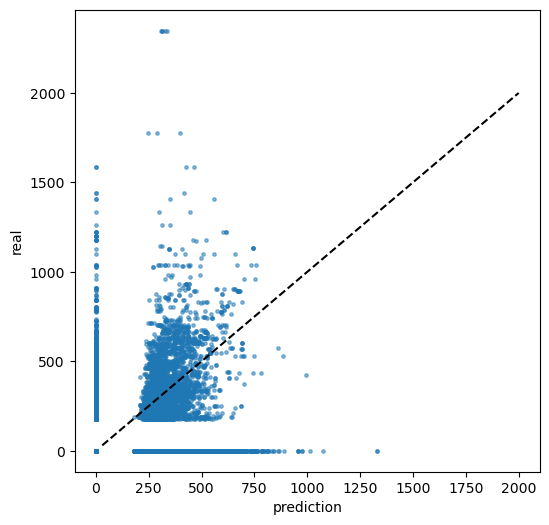

In [24]:
plt.figure(figsize=(6, 6))
plt.plot([30, 2000], [30, 2000], 'k--', label="Ideal y=x")
plt.scatter(test_gel['w_hat'], test_gel['sec_del'], cmap='viridis', s=6, alpha=0.5)
plt.xlabel("prediction")
plt.ylabel("real")